In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [2]:
def calculate_degree_distribution(adj_matrix):
    # Sum the rows to calculate the degree efficiently
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    return degrees

In [3]:
def plot_degree_distribution(degrees):
    # Count the frequency of each degree
    unique, counts = np.unique(degrees, return_counts=True)

    plt.figure(figsize=(8, 6))
    plt.bar(unique, counts, width=0.8, edgecolor='black')
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.title("Degree Distribution of the Graph")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [4]:
file_path = "../data/ppis/adjacency_matrix.csv"

try:
    adj_matrix = (pd.read_csv(file_path, sep=',').values)[:, 1:].astype(np.float32)
    print("Loaded adjacency matrix of shape:", adj_matrix.shape)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

Loaded adjacency matrix of shape: (14890, 14890)


In [5]:
# Ensure the matrix is in CSR format for efficient summation
if not isinstance(adj_matrix, csr_matrix):
    adj_matrix = csr_matrix(adj_matrix)

# Calculate the degree distribution
degrees = calculate_degree_distribution(adj_matrix)

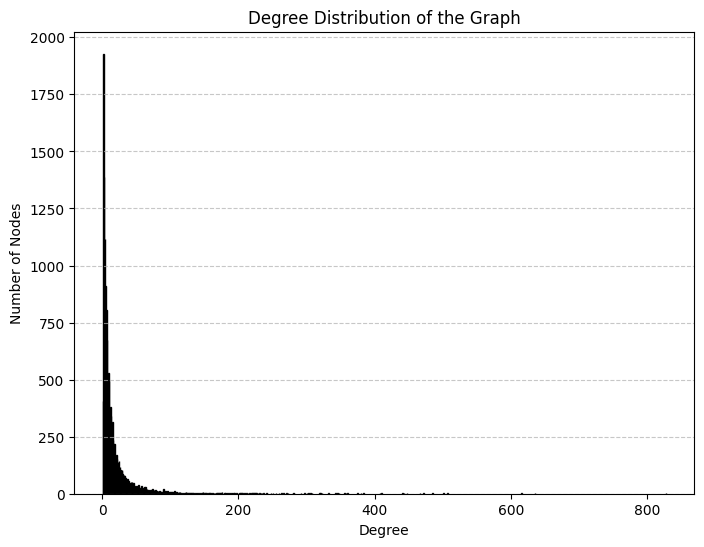

In [6]:
# Plot the degree distribution
plot_degree_distribution(degrees)